# Project: Wrangling and Analyze Data

In [1]:
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import requests
from scipy import stats


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Contains tweets with extra info already parsed from text
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Predictions of dog breeds
url_image_predictions = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')
# Create dataframe from TSV
df_image_predictions = pd.read_csv(url_image_predictions, delimiter='\t')
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time


In [5]:
# Twitter API for more data (save to local file)
#consumer_key = 'YOUR CONSUMER KEY'
#consumer_secret = 'YOUR CONSUMER SECRET'
#access_token = 'YOUR ACCESS TOKEN'
#access_secret = 'YOUR ACCESS SECRET'

consumer_key = 'lE0rhbCiSu1qoNZBtyVlAtbvp'
consumer_secret = 'DBKcFrHh8CxuyH4ut0P0H2XO6vkgShPWjtsoRr27P9jFJEtjRJ'
access_token = '1562078666301050882-OtCMdHIXU0o5aKbFNaQf5sj4ovWUA4'
access_secret = 'olaYX4cNksk2WfFXqLsssH7rXItgllIWv3HnE2bpl1uNq'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [7]:

# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
index = 0
# dictionary to catch the errors
error_dict = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open ('tweet_json.txt', 'w') as tweet_bk:
    # This will likely take 20 - 30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        index += 1
        try:
            # Get the status data for each of the tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(index) + ": " + "ID - " + str(tweet_id))
            # Convert each tweet status to JSON string and save it in the tweet_bk file
            json.dump(tweet._json, tweet_bk)
            # recognize \n as a break of text
            tweet_bk.write("\n")
            
        # Catching errors that might occur while accessing the tweet data or content
        except tweepy.TweepError  as error:
            print(str(index) + ": " + "ID - " + str(tweet_id) + " has an error:", error.response.text)
            # Appending the errors to the dictionary; error_dict
            error_dict[tweet_id] = error
            
end = time.time()
print(end - start)

1: ID - 892420643555336193
2: ID - 892177421306343426
3: ID - 891815181378084864
4: ID - 891689557279858688
5: ID - 891327558926688256
6: ID - 891087950875897856
7: ID - 890971913173991426
8: ID - 890729181411237888
9: ID - 890609185150312448
10: ID - 890240255349198849
11: ID - 890006608113172480
12: ID - 889880896479866881
13: ID - 889665388333682689
14: ID - 889638837579907072
15: ID - 889531135344209921
16: ID - 889278841981685760
17: ID - 888917238123831296
18: ID - 888804989199671297
19: ID - 888554962724278272
20: ID - 888202515573088257 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
21: ID - 888078434458587136
22: ID - 887705289381826560
23: ID - 887517139158093824
24: ID - 887473957103951883
25: ID - 887343217045368832
26: ID - 887101392804085760
27: ID - 886983233522544640
28: ID - 886736880519319552
29: ID - 886680336477933568
30: ID - 886366144734445568
31: ID - 886267009285017600
32: ID - 886258384151887873
33: ID - 886054160059072513
34:

In [8]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet_json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()
        
            
    
df_tweet_json = pd.DataFrame.from_dict(data)





In [9]:
df_tweet_json

,favorite_count,id,retweet_count
0,33696,892420643555336193,6969
1,29222,892177421306343426,5272
2,21978,891815181378084864,3464
3,36787,891689557279858688,7191
4,35180,891327558926688256,7715
5,17747,891087950875897856,2586
6,10330,890971913173991426,1647
7,56663,890729181411237888,15679
8,24424,890609185150312448,3604
9,27844,890240255349198849,6067


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [10]:
# observation of the data in our df_twitter_archive 
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# observation of the data in the df_image_predictions 
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
# observation of the data in the df_tweet_json
df_tweet_json

,favorite_count,id,retweet_count
0,33696,892420643555336193,6969
1,29222,892177421306343426,5272
2,21978,891815181378084864,3464
3,36787,891689557279858688,7191
4,35180,891327558926688256,7715
5,17747,891087950875897856,2586
6,10330,890971913173991426,1647
7,56663,890729181411237888,15679
8,24424,890609185150312448,3604
9,27844,890240255349198849,6067


### Programmatic Assessment

In [13]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 3 columns):
favorite_count    874 non-null int64
id                874 non-null int64
retweet_count     874 non-null int64
dtypes: int64(3)
memory usage: 20.6 KB


In [16]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_tweet_json.describe()

,favorite_count,id,retweet_count
count,874.000000,8.740000e+02,874.000000
mean,12943.575515,8.199838e+17,4329.510297
std,13555.041558,3.713945e+16,4872.390962
min,0.000000,6.853251e+17,1.000000
25%,4986.250000,7.895480e+17,1797.500000
50%,9864.000000,8.184220e+17,2965.500000
75%,18213.500000,8.481538e+17,5066.500000
max,123678.000000,8.924206e+17,51423.000000


In [19]:
# Get the number of missing values in our twitter_archive data
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
# Get the number of missing values in our twitter_archive data
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
# Get the number of missing values in our twitter_archive data
df_tweet_json.isnull().sum()

favorite_count    0
id                0
retweet_count     0
dtype: int64

In [22]:
# Get the numbe rof unique values in the columns in our twitter_archive data
df_twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [23]:
# Get the numbe rof unique values in the columns in our twitter_archive data
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [24]:
# Get the numbe rof unique values in the columns in our twitter_archive data
df_tweet_json.nunique()

favorite_count    720
id                874
retweet_count     737
dtype: int64

In [25]:
# Get the number of duplicate rows in our twitter_archive data
df_twitter_archive.duplicated().sum()

0

In [26]:
# Get the number of duplicate rows in our twitter_archive data
df_image_predictions.duplicated().sum()

0

In [27]:
# Get the number of duplicate rows in our twitter_archive data
df_tweet_json.duplicated().sum()

0

In [28]:
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [29]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
Bailey         7
Toby           7
an             7
Scout          6
Koda           6
Jack           6
Rusty          6
Milo           6
Leo            6
Oscar          6
Stanley        6
Jax            6
Bella          6
Dave           6
Louis          5
            ... 
Lulu           1
Tedrick        1
Thor           1
Pepper         1
Hubertson      1
Hector         1
Derby          1
Gustaf         1
Sunshine       1
Marvin         1
Jazz           1
Blipson        1
Chubbs         1
Gin            1
Joshwa         1
Blanket        1
Jockson        1
Emma           1
Shawwn         1
Dale           1
Jeffri         1
Randall        1
Jennifur       1
Ronnie         1
Sojourner      1
Anna           1
Donny          1
Gert          

In [30]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [32]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [33]:
df_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
chow                               20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [34]:
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

### Quality issues

### df_twitter_archive table

1.Some of name colunms is not define with real name.

2.wrong data types  timestamp)

3.There are tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis

4.retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns contain mostly missing values
in_reply_to_status_id and in_reply_to_user_id columns contain mostly missing values

5.missing values in expanded_urls column


### df_image_predictions table

6.p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)

7.Delete columns that won't be used for analysis

### df_tweet_info table
8.The column label for tweet IDs should be the same across the three separate datasets.



### Tidiness issues
The column label for tweet IDs should be the same across the three datasets.
The three tables should be combined as one single dataset

### df_twitter_archive table

one variable in four columns (doggo, floofer, pupper, and puppo)



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

### Issue #1:

 1.Some of name colunms without real name.



#### Define:

In the df_twitter_archive dataset we have some name without real name  values, so we have to change 'a' with 'none' 

#### Code

In [36]:
def replace_names(row):
    # Only try to replace name if it is 'other'
    if row['name'] == 'a':    
        #get text from row
        text = row['text']
        
        # get list of words from the text
        word_list = text.split()

        # defaults to no name
        name = 'None'

        # get name from 'named {}'
        if 'named' in word_list:
            # Get the next word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]

        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]

        #only replace the 'name' column (with no period)
        row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    

df_twitter_archive_clean = df_twitter_archive_clean.apply(replace_names, axis=1)

#### Test

In [37]:
# Check if there is no 'a' names
'a' in df_twitter_archive_clean['name']

False

### Issue #2:
in df_twitter_archive we have to timestamp from 'objct' to 'datatime' type

#### Define

Change type timestamp from 'object' to 'datetimes' type

#### Code

In [38]:
# Convert timestamp column to datetime
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive['timestamp'])


#### Test

In [39]:
# Check data types are now correct
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #3#4:
retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values contains missesd value and  won't be used for our analysis


### Define
Drop retweetes 

### Code

In [40]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_user_id.isnull()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_timestamp.isnull()]

### Test

In [41]:
# Check if the retweets have been droped
print(df_twitter_archive_clean.retweeted_status_id.notnull().sum())
print(df_twitter_archive_clean.retweeted_status_user_id.notnull().sum())
print(df_twitter_archive_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


### Issue #5:
Delete Messing Value url  and columns won't be used for our analysis

### Define
drop columns  won't be used for our analysis

### Code

In [42]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                     'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)

### Test

In [43]:
df_twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


### Issue #6:
 df_image_predictions table

p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)


### Define
Change all p1, p2, and p3 values to lower case.


### Code

In [44]:
# Change the p1, p2, and p3 values all to lower case.
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.lower()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.lower()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.lower()

### Test

In [45]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue##7
7. df_image_prediction Delete columns that won't be used for analysis

### Define

 Delete columns that won't be used for analysis

### Code

In [46]:
### print list of image_prediction columns

print(list(df_image_predictions_clean))

#Delete columns
df_image_predictions_clean = df_image_predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)



['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


### Test

In [47]:
df_image_predictions_clean.columns

Index(['tweet_id', 'jpg_url'], dtype='object')

### Issue ##8
.The column label for tweet IDs should be the same across the three separate datasets.

### define
id in df_tweet_info_clean(json) tabale must be rename.

### Code

In [48]:
df_tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [49]:
df_tweet_json_clean.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

### Tideness
Merges 3Tables


### define
Merge table df_twitter_archive_clean et   df_image_predictions_clean

### Code

In [50]:
# Only keep predictions that have ids in archive 

df1 = df_twitter_archive_clean
df2 = df_image_predictions_clean

df_final_clean = pd.merge(df1, df2, how='left', on=['tweet_id'])

### Test

In [51]:

        
# If tweet id (from image predictions) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_image_predictions_clean.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in archive
    if tweet_id not in df_twitter_archive_clean.tweet_id.values:
        # Check that it also isn't in new df
        if tweet_id in df_final_clean.tweet_id.values:
            print('Paradox! ID#{} in final DF but shouldn\'t be'.format(tweet_id))
            


In [52]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1994 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


### define
Merge df_final_clean and df_tweet_json_clean

### code

In [53]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_final_clean
df2 = df_tweet_json_clean
df2.rename(columns={'id':'tweet_id'}, inplace=True)

df_final_clean = pd.merge(df1, df2, how='left', on=['tweet_id'])

### test

In [54]:
# If tweet id (from tweet info) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_tweet_json_clean.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in new df
    if tweet_id not in df_twitter_archive_clean.tweet_id.values:
        # Test if id is also in new df
        if tweet_id in df_final_clean.tweet_id.values:
            print('ID#{} in final DF but shouldn\'t be'.format(tweet_id))
            


In [55]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1994 non-null object
favorite_count        726 non-null float64
retweet_count         726 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


### Define

Make one column for dog stage (doggo, floofer, pupper, and puppo) by saving value ('None' if no dog stage given). 

### Code

In [56]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
df_final_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
df_final_clean = df_final_clean.apply(get_dog_stage, axis=1)

# Drop the redundant columns
df_final_clean = df_final_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [57]:
df_final_clean.dog_stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [58]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
jpg_url               1994 non-null object
favorite_count        726 non-null float64
retweet_count         726 non-null float64
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
# Store data on tweet_json.txt
df_final_clean.to_csv('twitter_archive_master.csv', index=False)

In [60]:
# Check if it was properly saved
df_final_clean = pd.read_csv("twitter_archive_master.csv")


In [61]:
df_final_clean.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage
282,832645525019123713,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,10,10,not,NaN,2731.0,484.0,None


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
df_final_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.175000e+03,2175.000000,2175.000000,726.000000,726.000000
mean,7.371205e+17,13.215172,10.492874,15582.210744,4031.939394
std,6.748668e+16,47.725696,7.019084,13419.195218,4703.067339
min,6.660209e+17,0.000000,0.000000,59.000000,1.000000
25%,6.768432e+17,10.000000,10.000000,7544.500000,1783.750000
50%,7.098528e+17,11.000000,10.000000,11815.000000,2785.500000
75%,7.894226e+17,12.000000,10.000000,19825.000000,4443.500000
max,8.924206e+17,1776.000000,170.000000,123678.000000,51423.000000


In [63]:
df_final_clean['dog_stage'].value_counts()


None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [64]:
df_final_clean.name.value_counts() / df_final_clean.shape[0] * 100

None        32.873563
Charlie      0.505747
Lucy         0.505747
Oliver       0.459770
Cooper       0.459770
Penny        0.413793
Tucker       0.413793
the          0.367816
Lola         0.367816
Winston      0.367816
Sadie        0.367816
Daisy        0.321839
Toby         0.321839
Jax          0.275862
Bo           0.275862
Stanley      0.275862
Bailey       0.275862
Koda         0.275862
Oscar        0.275862
Bella        0.275862
an           0.275862
Rusty        0.229885
Bentley      0.229885
Louis        0.229885
Scout        0.229885
Leo          0.229885
Milo         0.229885
Buddy        0.229885
Chester      0.229885
Dave         0.229885
              ...    
Chuk         0.045977
Bradley      0.045977
Rolf         0.045977
Blue         0.045977
Shawwn       0.045977
Sunshine     0.045977
Emma         0.045977
Jockson      0.045977
Bubba        0.045977
Monster      0.045977
Butter       0.045977
Angel        0.045977
Meera        0.045977
Barney       0.045977
Goose     

### Insights:
The minimum favorite count is 59, mean is 15592

the maximum favorite count is 123681

The minimum retweet count is 1, mean is 4032,  

the maximum retweet count is 51423

about 32%  of the dogs without name

### Visualization

Does retweet count positively correlate with favourite count?

In [65]:
df_final_clean.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
tweet_id,1.000000,0.053589,-0.024052,0.409521,0.160618
rating_numerator,0.053589,1.000000,0.150362,-0.058208,-0.046106
rating_denominator,-0.024052,0.150362,1.000000,-0.006861,-0.004507
favorite_count,0.409521,-0.058208,-0.006861,1.000000,0.917621
retweet_count,0.160618,-0.046106,-0.004507,0.917621,1.000000


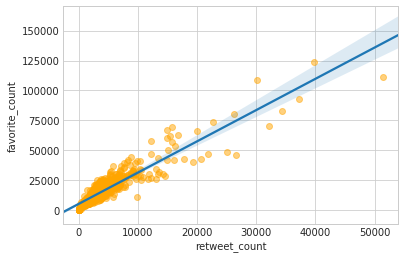

In [66]:
sns.set_style('whitegrid')
sns.regplot(df_final_clean.retweet_count, df_final_clean.favorite_count, scatter_kws = {'color': 'orange', 'alpha': 0.5})

In the above plot, we are trying to show the linear relationship between retweet_count and favorite_count.
There is a strong positive linear relation between retweet_count and favorite_Count.

